# Smart Recycling using Deep Learning

The aim of this project or assignment is to develop a deep learning algorithm which can find the difference between the recyclables and organics. Recycling is a huge process and it helps us to keep our environmnt safe throug reusing the same product again and again. But organics being present in recyclable bins can be very cost effective and time consuming as it needs filtering the waste manually.

# Describe the desired inputs and outputs, including the target classes.

The inputs to this project are the images which are of recyclables and organics. The images could be captured from mobile phone manually and can be used from the internet, freely available datasets eg, kaggle. The output is the factor which tells us that the waste is recyclabble or organics. I will use the output as a binary number 0 and 1. 0 means the waste is organic and 1 means the waste is a recyclabble.

The target classes are are the attributes(Items) of entities(Recyclables and organics).

# TARGET CLASSES

*organics

(Food waste, Electronics, Plastic bags, Non recyclable plastics, Rexins.)

*Recyclables

(Paper, Cardboard, Aluminium cans, Glass containers, Plastic bottles)

# What dataset can you use to develop a deep learning solution?

I will use the pictures of waste for both the categories i.e, recyclables and organics. I can take the pictures manually and can use the freely data available on internet. In this task I have downloaded the dataset from Kaggle which was freely available and I am attching the link here as well.

# How many images do you need? How many for training? How many for testing?

Building this deep learning model required heeps of data(images). I have almost 22 thousand images for training and 2000 images for testing which was available on internet from different sources. The model will perform better if I use as much as data for training.

# Do you need to label the images yourself?

The dataset which I am using was having pre-labelled images. so, in this particular tasl I am not lebelling the images by myself.

# How do you determine if your model is good enough?

There are various factors which will determine the quality and performance of my model. I personally belive that if the models accuracy is more than 75%, less training loss, more validation accuracy and less validation loss then we can say that the model is good.

# Implementing a solution

# Collecting relevant data.

# Develop a deep learning model.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\SYED ANFAS\DATASET\TRAIN',
    labels='inferred',
    label_mode = 'int',
    batch_size=30,
    image_size=(256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\SYED ANFAS\DATASET\TEST',
    labels='inferred',
    label_mode = 'int',
    batch_size=30,
    image_size=(256,256)
)

Found 19717 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#proof of labelling
import tensorflow as tf
import os


train_directory = r'C:\Users\SYED ANFAS\DATASET\TRAIN'

class_names = sorted(os.listdir(train_directory))

print("Class names:", class_names)


Class names: ['O', 'R']


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=8,validation_data=validation_ds)

Epoch 1/8
658/658 [==============================] - 1543s 2s/step - loss: 1.7604 - accuracy: 0.7441 - val_loss: 0.4997 - val_accuracy: 0.6952
Epoch 2/8
658/658 [==============================] - 1715s 3s/step - loss: 0.4571 - accuracy: 0.8062 - val_loss: 0.4672 - val_accuracy: 0.8337
Epoch 3/8
658/658 [==============================] - 1558s 2s/step - loss: 0.3991 - accuracy: 0.8360 - val_loss: 0.4671 - val_accuracy: 0.7290
Epoch 4/8
658/658 [==============================] - 1456s 2s/step - loss: 0.3478 - accuracy: 0.8545 - val_loss: 0.5575 - val_accuracy: 0.7449
Epoch 5/8
658/658 [==============================] - 1492s 2s/step - loss: 0.3191 - accuracy: 0.8648 - val_loss: 0.3291 - val_accuracy: 0.8639
Epoch 6/8
658/658 [==============================] - 1513s 2s/step - loss: 0.2959 - accuracy: 0.8749 - val_loss: 0.3765 - val_accuracy: 0.8424
Epoch 7/8
658/658 [==============================] - 1517s 2s/step - loss: 0.2753 - accuracy: 0.8822 - val_loss: 0.3252 - val_accuracy: 0.8544

# Report the model performance against the success criteria that you define.

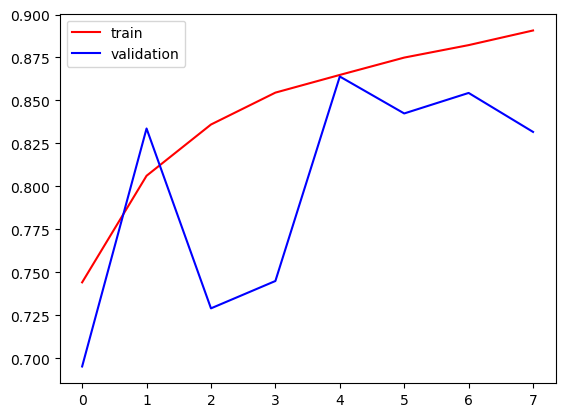

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

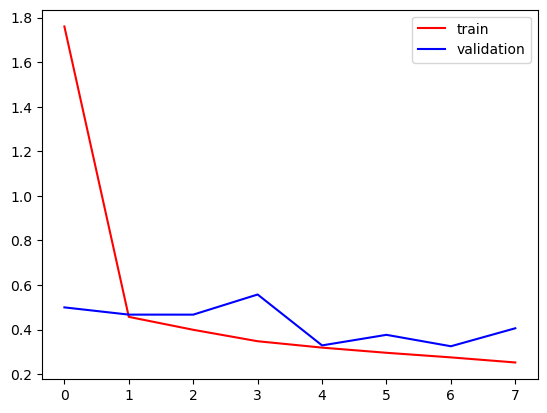

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

As you can see from the model performance, I can say that the model accuracy is good but after keenly observing we can say that the model is OVERFITTING. It can be seen that the training accuracy is consistently higher than the validation accuracy.It occurs when a model learns to perform well on the training data but struggles to generalize to new and unseen data. I am need to do some changes or may need some data to overcome this issue.

# Analysing and improving the model

# Pipeline for data augmentation

# Build a data preprocessing pipeline to perform data augmentation.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        width_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=30,
        brightness_range=[0.7, 1.3],
        )

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        r'C:\Users\SYED ANFAS\DATASET\TRAIN',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\SYED ANFAS\DATASET\TEST',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 19717 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=10,
        validation_data = validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')

Epoch 1/10


C:\Users\SYED ANFAS\AppData\Local\Temp\ipykernel_12260\1373015348.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


125/125 [==============================] - 28s 227ms/step - loss: 0.4446 - accuracy: 0.8150 - val_loss: 0.4899 - val_accuracy: 0.8138
Epoch 2/10
125/125 [==============================] - 33s 264ms/step - loss: 0.4322 - accuracy: 0.8310 - val_loss: 0.3953 - val_accuracy: 0.8363
Epoch 3/10
125/125 [==============================] - 32s 258ms/step - loss: 0.4286 - accuracy: 0.8275 - val_loss: 0.5622 - val_accuracy: 0.7475
Epoch 4/10
125/125 [==============================] - 32s 256ms/step - loss: 0.4125 - accuracy: 0.8205 - val_loss: 0.3766 - val_accuracy: 0.8450
Epoch 5/10
125/125 [==============================] - 31s 251ms/step - loss: 0.4038 - accuracy: 0.8450 - val_loss: 0.3528 - val_accuracy: 0.8687
Epoch 6/10
125/125 [==============================] - 32s 255ms/step - loss: 0.4263 - accuracy: 0.8305 - val_loss: 0.4302 - val_accuracy: 0.8325
Epoch 7/10
125/125 [==============================] - 31s 250ms/step - loss: 0.4343 - accuracy: 0.8280 - val_loss: 0.3688 - val_accuracy: 0.8

# - Report the model performance with the pipeline added. How much performance gain have you achieved?

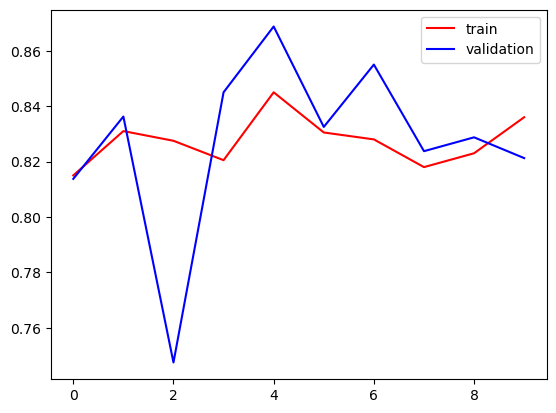

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

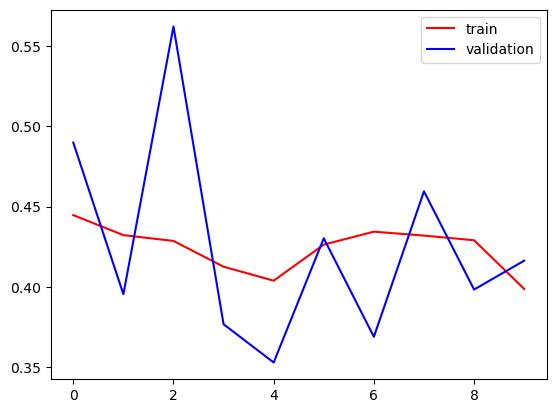

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Comparing the performance under equal training time

# You may notice that with your pipeline, the model performance improves, but at the cost of a longer training time per epoch. Is the additional training time well spent? Compare the dynamic of model performance (e.g., classification accuracy on the test data) with and without data augmentation, when equal training time is spent in the two scenarios.

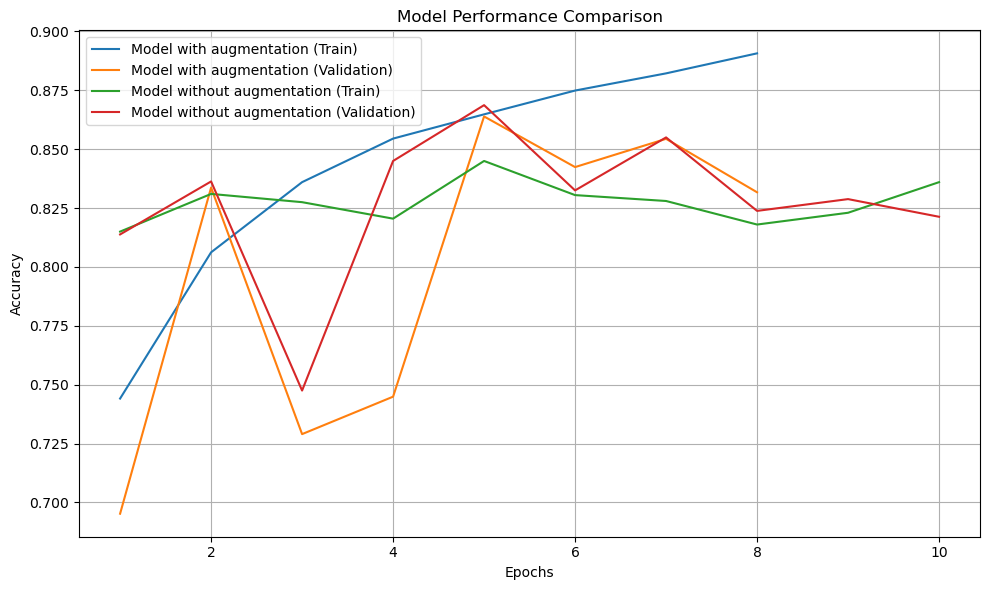

In [ ]:
import matplotlib.pyplot as plt

epochs_model_a = [1, 2, 3, 4, 5, 6, 7, 8]
train_accuracy_model_a = [0.7441, 0.8062, 0.8360, 0.8545, 0.8648, 0.8749, 0.8822, 0.8907]
val_accuracy_model_a = [0.6952, 0.8337, 0.7290, 0.7449, 0.8639, 0.8424, 0.8544, 0.8317]

epochs_model_b = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_accuracy_model_b = [0.8150, 0.8310, 0.8275, 0.8205, 0.8450, 0.8305, 0.8280, 0.8180, 0.8230, 0.8360]
val_accuracy_model_b = [0.8138, 0.8363, 0.7475, 0.8450, 0.8687, 0.8325, 0.8550, 0.8238, 0.8288, 0.8213]

plt.figure(figsize=(10, 6))
plt.plot(epochs_model_a, train_accuracy_model_a, label='Model with augmentation (Train)')
plt.plot(epochs_model_a, val_accuracy_model_a, label='Model with augmentation (Validation)')
plt.plot(epochs_model_b, train_accuracy_model_b, label='Model without augmentation (Train)')
plt.plot(epochs_model_b, val_accuracy_model_b, label='Model without augmentation (Validation)')


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


It is clear from the graph above that there are various changes between the two models.
* The training time got reduced to a huge extend.
* Data augmentation has reduced the problem of overfitting.
* The training times for data augmentation set of epochs are somewhat shorter compared to the model without data augmentation epochs but still significantly longer than the data augmentation model. This indicates that data augmentation may have a computational cost.
* Despite the shorter training time per epoch, Model with data augmentation performs reasonably well and reaches a validation accuracy close to Model without data augmentation. This suggests that data augmentation has helped improve the model's generalization, allowing it to perform well with less training time per epoch.

# Identifying model strengths and weaknesses

Identify images that are incorrectly classified by your model. Do they share something in common? How do you plan to improve the model's performance on those images?

I have attached a sample in which it can be seen that the models prediction is fuzzy and the model is not predicting the actual class. I have planned to improve my model by adding some features. I can improve the model performance by adding mode training data to the model so that the model can perform accurately.

![fuzzy%20output.png](attachment:fuzzy%20output.png)

# Improving model generalisability across domains

# So far, you have used training and test images from the same source (via random data split). Now collect new test images from a different source. For example, you may take some photos yourself if you used downloaded images before. Otherwise, you may take new photos using a different mobile phone or against a different background.

I have added more 20,000 samples to the training data to improve the performance. I have downloaded the data from a different source to the first one.

![NUmber%20of%20images.png](attachment:NUmber%20of%20images.png)

# Show sample images from the original test data and the newly collected test data. In what ways are they different?

# Existing Images

![existingimages.png](attachment:existingimages.png)

![existingimages1.png](attachment:existingimages1.png)

# New Images

![newimages.png](attachment:newimages.png)

![newimages1.png](attachment:newimages1.png)

As you can see that the previous data and new data is different as I have added new images for both the classes (organics and recyclables). The new data is quite different in terms of brightness and contrast.

# Feed the new test data into your model. Report the performance change.

In [ ]:
train_dsnew = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\SYED ANFAS\WASTE\waste_dataset",
    labels='inferred',
    label_mode = 'int',
    batch_size=30,
    image_size=(256,256)

)

validation_dsnew = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\SYED ANFAS\WASTE\TEST",
    labels='inferred',
    label_mode = 'int',
    batch_size=30,
    image_size=(256,256)
)

Found 44422 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_dsnew = train_dsnew.map(process)
validation_dsnew = validation_dsnew.map(process)

In [ ]:
len(train_dsnew)

1481

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_dsnew,epochs=8,validation_data=validation_dsnew)

Epoch 1/8
1481/1481 [==============================] - 2767s 2s/step - loss: 0.7150 - accuracy: 0.7961 - val_loss: 0.4007 - val_accuracy: 0.8317
Epoch 2/8
1481/1481 [==============================] - 2670s 2s/step - loss: 0.3656 - accuracy: 0.8548 - val_loss: 0.3908 - val_accuracy: 0.7907
Epoch 3/8
1481/1481 [==============================] - 2696s 2s/step - loss: 0.3257 - accuracy: 0.8689 - val_loss: 0.2645 - val_accuracy: 0.8906
Epoch 4/8
1481/1481 [==============================] - 3157s 2s/step - loss: 0.2677 - accuracy: 0.8962 - val_loss: 0.2324 - val_accuracy: 0.9105
Epoch 5/8
1481/1481 [==============================] - 3998s 3s/step - loss: 0.2185 - accuracy: 0.9165 - val_loss: 0.2375 - val_accuracy: 0.9025
Epoch 6/8
1481/1481 [==============================] - 2692s 2s/step - loss: 0.1570 - accuracy: 0.9414 - val_loss: 0.2061 - val_accuracy: 0.9236
Epoch 7/8
1481/1481 [==============================] - 2650s 2s/step - loss: 0.1037 - accuracy: 0.9631 - val_loss: 0.1467 - val_ac

# Reporting model's performance.

# As you can see from the metrics above and the fgraphs plotted, after adding more 20,000 samples the models performance has increased to 97.34%. The training loss is all time low 7.6%, the validation accuracy got improved and the validation loss is also significanly low when compare to other previous two models.
# It can be say that spending extra time and adding more training data has helped in improving the models performance.

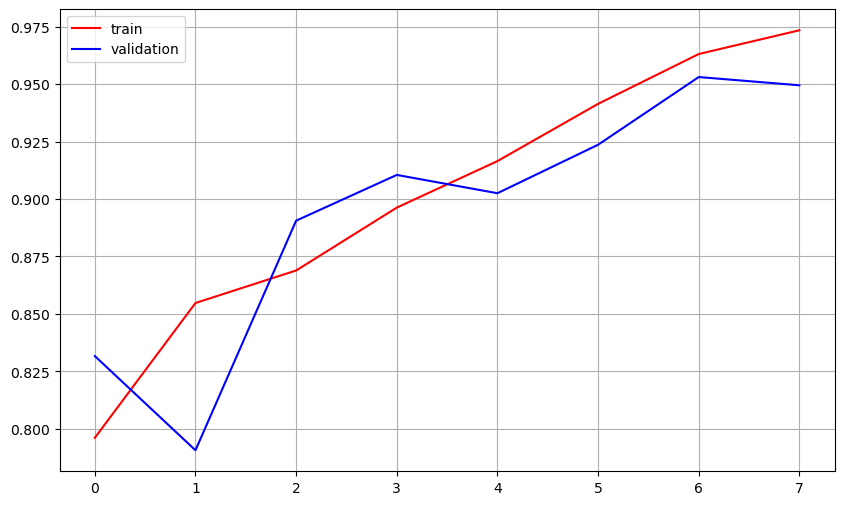

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')

plt.grid(True)
plt.legend()
plt.show()

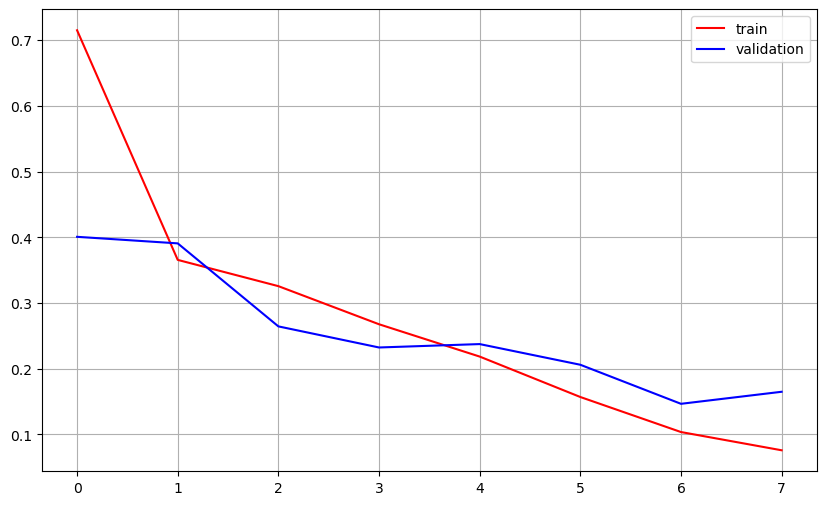

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')

plt.grid(True)
plt.legend()
plt.show()

# Improve your model so that it generalises better on unseen test images.

# You need to include sufficient analysis to demonstrate that:

# You have obtained a deeper understanding of challenges in model generalisation, through designing experiments and analysing the results.

In [ ]:

import cv2


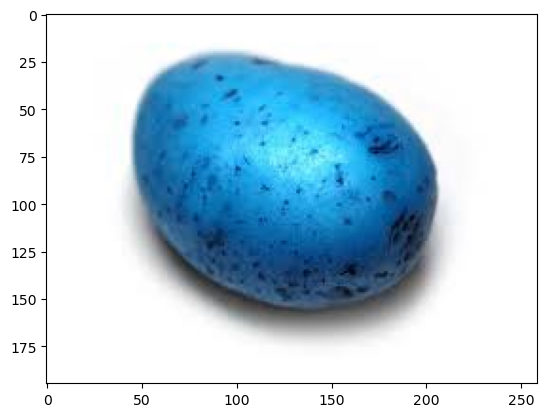

In [ ]:
test_img = cv2.imread(r"C:\Users\SYED ANFAS\Testing\test_org1.jpg")
plt.imshow(test_img)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_img.shape


(256, 256, 3)

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 56ms/step


array([[1.]], dtype=float32)

As you can see that first we found out the model performance on the dataset which were having 22,000 samples and our model was overfitting. Then we applied data augmentation to overcome this issue. Data augmentation has solved our problem to a huge extend but for further improvement we have used some more training samples to improve the model. Beside this I have also tried various hyperamenters, used different batch sizes and trained the model for different epochs.